In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pychromatic import Multiplot

In [2]:
df=pd.read_pickle("dft_ref_data.pkl.gz")
df=df.sort_values(["c_Li","vpa"])
df_chull=df.query("e_chull_dist_per_atom<0.001")

In [43]:
colors = {"g": "#1b9e77", "r": "#d95f02", "b": "#7570b3"}

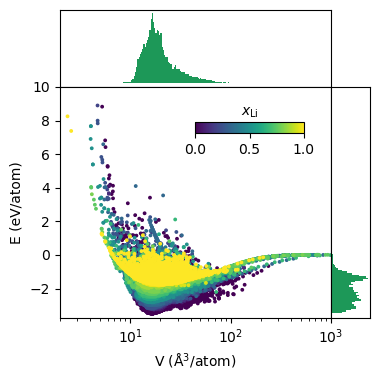

In [54]:
s=3
fig, ((ax_vpa_hist, ax_inv), (ax_ev, ax_epa_hist)) = plt.subplots(2, 2, 
                                                                  figsize=(4, 4),
                                        gridspec_kw={'width_ratios': [7, 1],
                                                     'height_ratios': [1, 3]
                                                     }, facecolor="white")
ax_inv.set_visible(False)
# ax_inv2.set_visible(False)

##### ax_vpa_hist
energy_hist_res = ax_vpa_hist.hist(df["vpa"], bins=np.logspace(0,3,num=250), color="#1D9858")#, color="gray")
ax_vpa_hist.get_xaxis().set_visible(False)
ax_vpa_hist.get_yaxis().set_visible(False)
yl = ax_vpa_hist.get_ylim()
lim = (yl[0] - (yl[1] - yl[0]) * 0.05, yl[1])
ax_vpa_hist.set_ylim(lim)
ax_vpa_hist.set_xscale('log')
ax_vpa_hist.set_xlim(2,1e3)

#### ax 1

p = ax_ev.scatter(df["vpa"],df["energy_corrected_per_atom"], c= df["c_Li"], s=s, cmap='viridis');
ax_ev.set_xscale('log')
ax_ev.set_xlim(ax_vpa_hist.get_xlim())
ax_ev.set_ylim(-3.75,10)
ax_ev.set_xlabel("V $(\mathrm{\AA}^3$/atom)");
ax_ev.set_ylabel("E (eV/atom)");

# ax_ev.yaxis.tick_right()
# ax_ev.yaxis.set_label_position("right")

#cbaxes = fig.add_axes([0.25, -0.05, 0.5, 0.03]) 
cbaxes = ax_ev.inset_axes([0.5,0.8,0.4,0.05])
cbar=plt.colorbar(p, cax=cbaxes, orientation='horizontal')
cbar.ax.set_xlabel(r"$x_\mathrm{Li}$")
cbar.ax.xaxis.set_label_position("top")

########## ax_epa_hist
    
ax_epa_hist.get_xaxis().set_visible(False)
ax_epa_hist.get_yaxis().set_visible(False)

hist_res = ax_epa_hist.hist(df["energy_corrected_per_atom"],
                    bins=np.linspace(-3.75,10,num=150), density=True, orientation="horizontal",color="#1D9858");

ax_epa_hist.set_ylim(ax_ev.get_ylim())
# ax_epa_hist.set_xscale('log')
# xlim=ax_epa_hist.get_xlim()
# ax_epa_hist.set_xlim(xlim[1],xlim[0])
plt.subplots_adjust(wspace=0.0, hspace=0.0)

#######
plt.savefig("dft-e-v-dist.png", dpi=300, bbox_inches='tight')